In [1]:
# !pip install statsmodels
# !pip install openpyxl

Forecast the CocaCola prices . Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

In [2]:
# create a line plot
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
import seaborn as sns
sns.set_theme(style='darkgrid', palette='viridis')
import warnings
warnings.filterwarnings('ignore')

In [3]:
series = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
# series = pd.read_csv('CocaCola_Sales_Rawdata.csv')
series.info()
series.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 804.0+ bytes


,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [4]:
series
series.columns = series.columns.str.replace(' ', '')

No null values Exist
Quarter is object type since its a Quarter need to change it to Dates

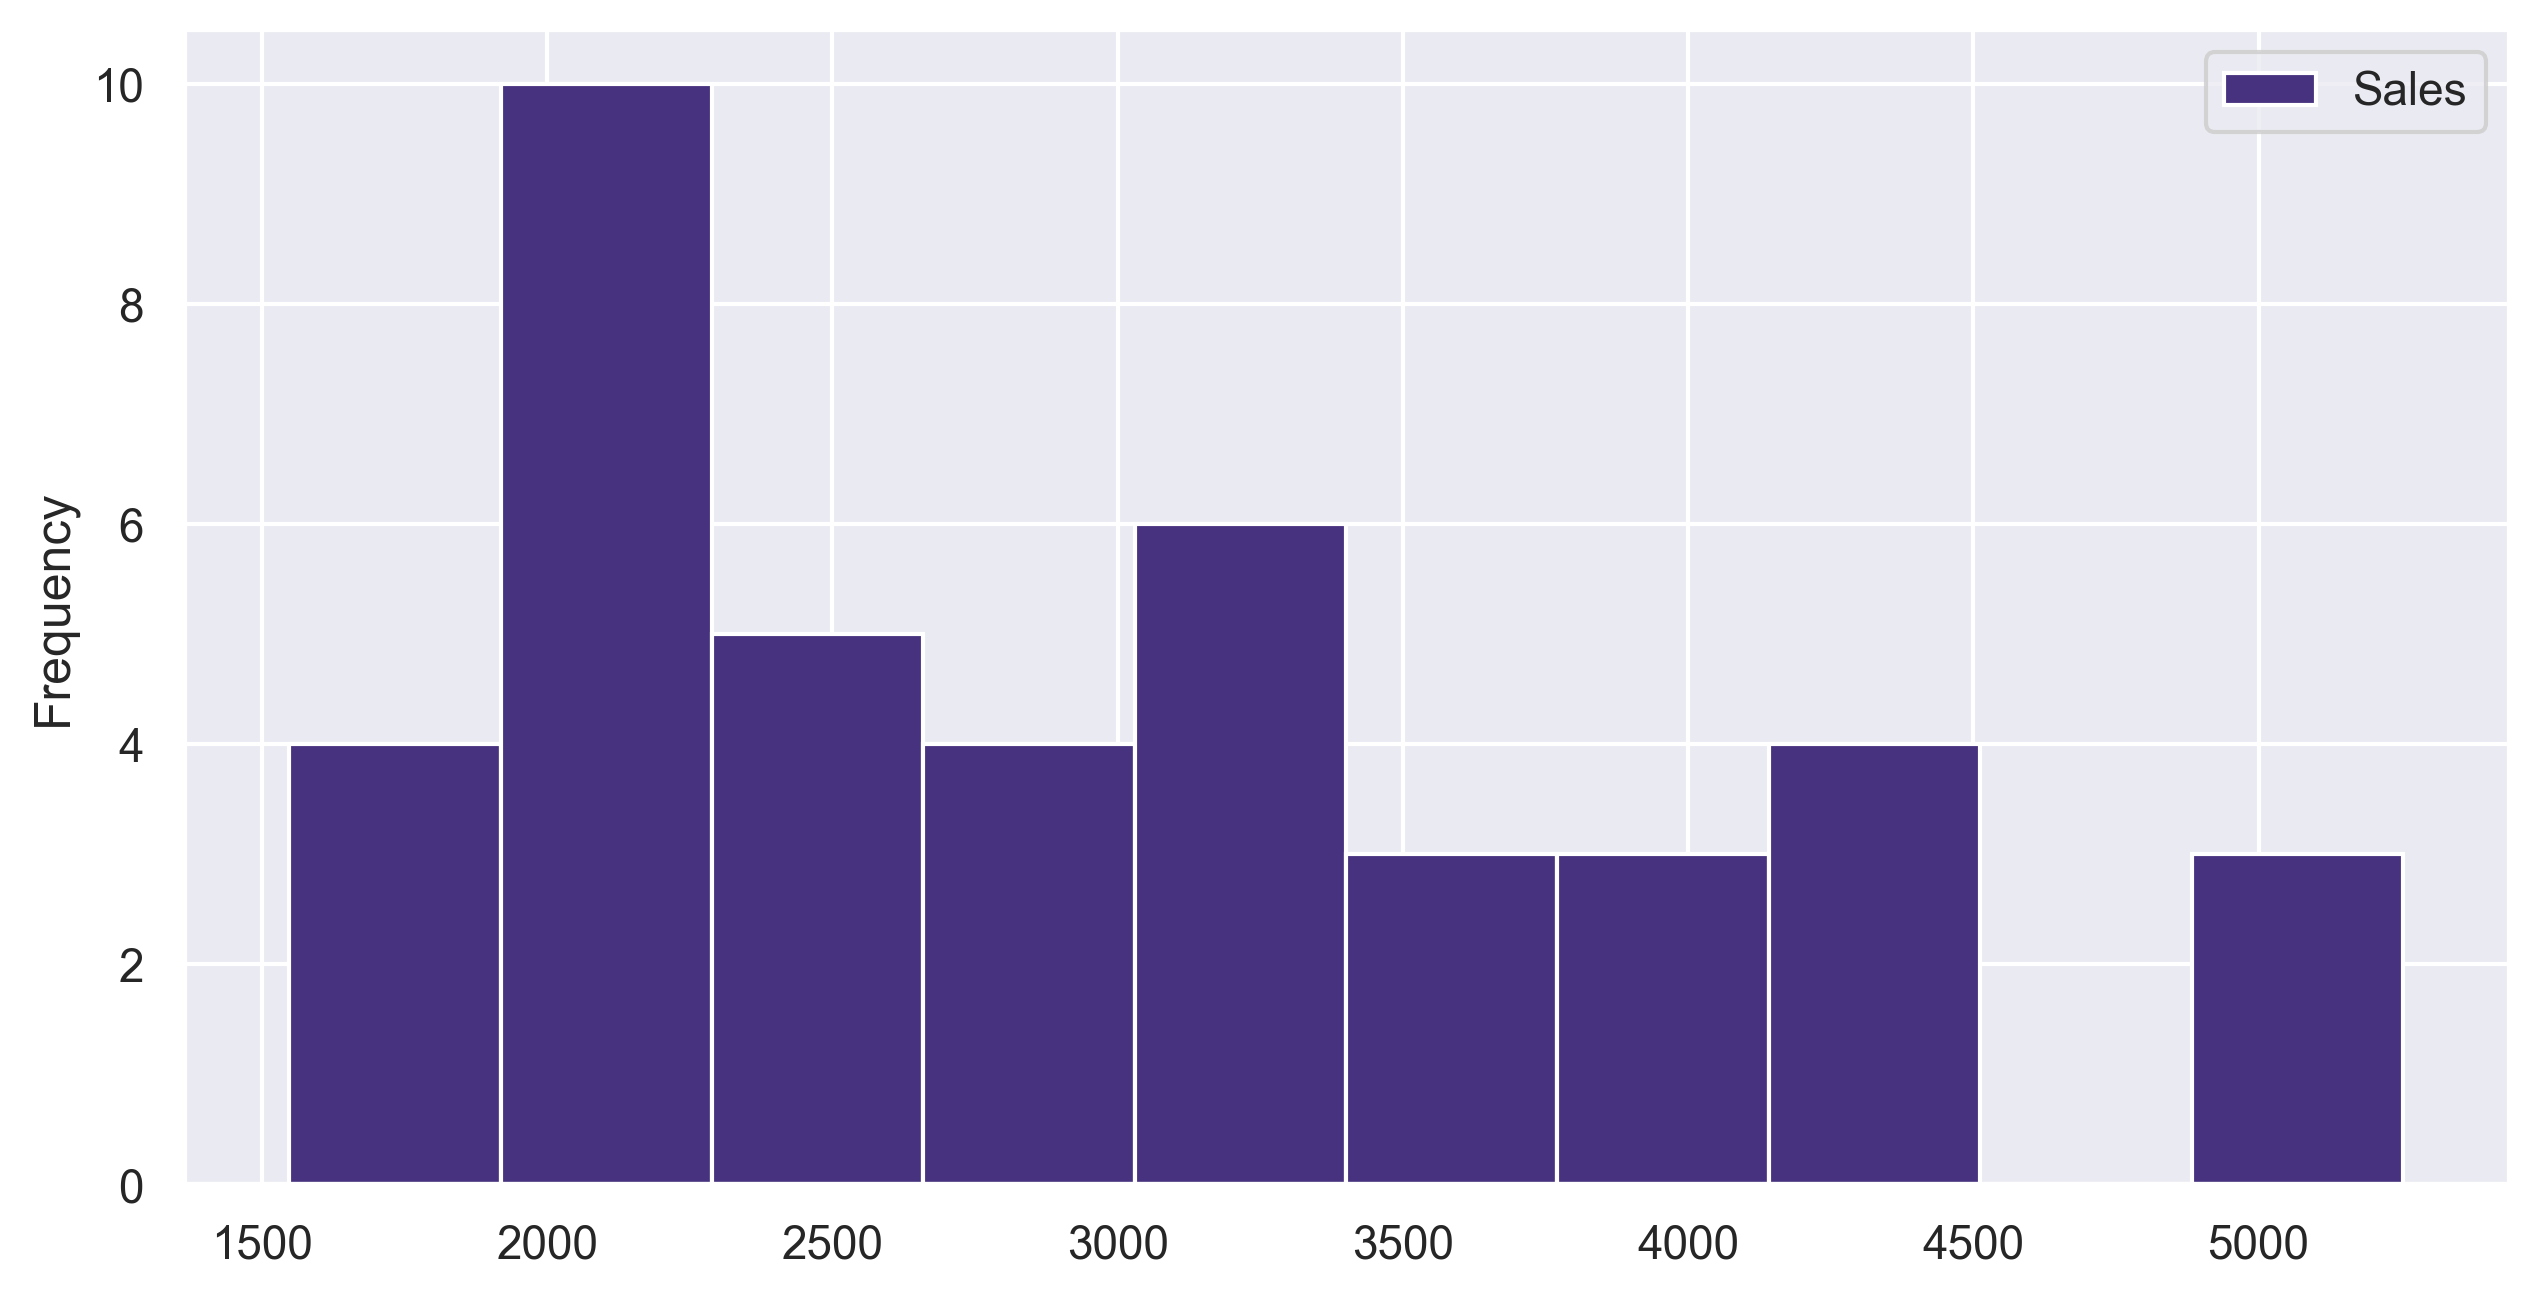

In [5]:
series.plot(kind='hist')
plt.show()

<Axes: ylabel='Density'>

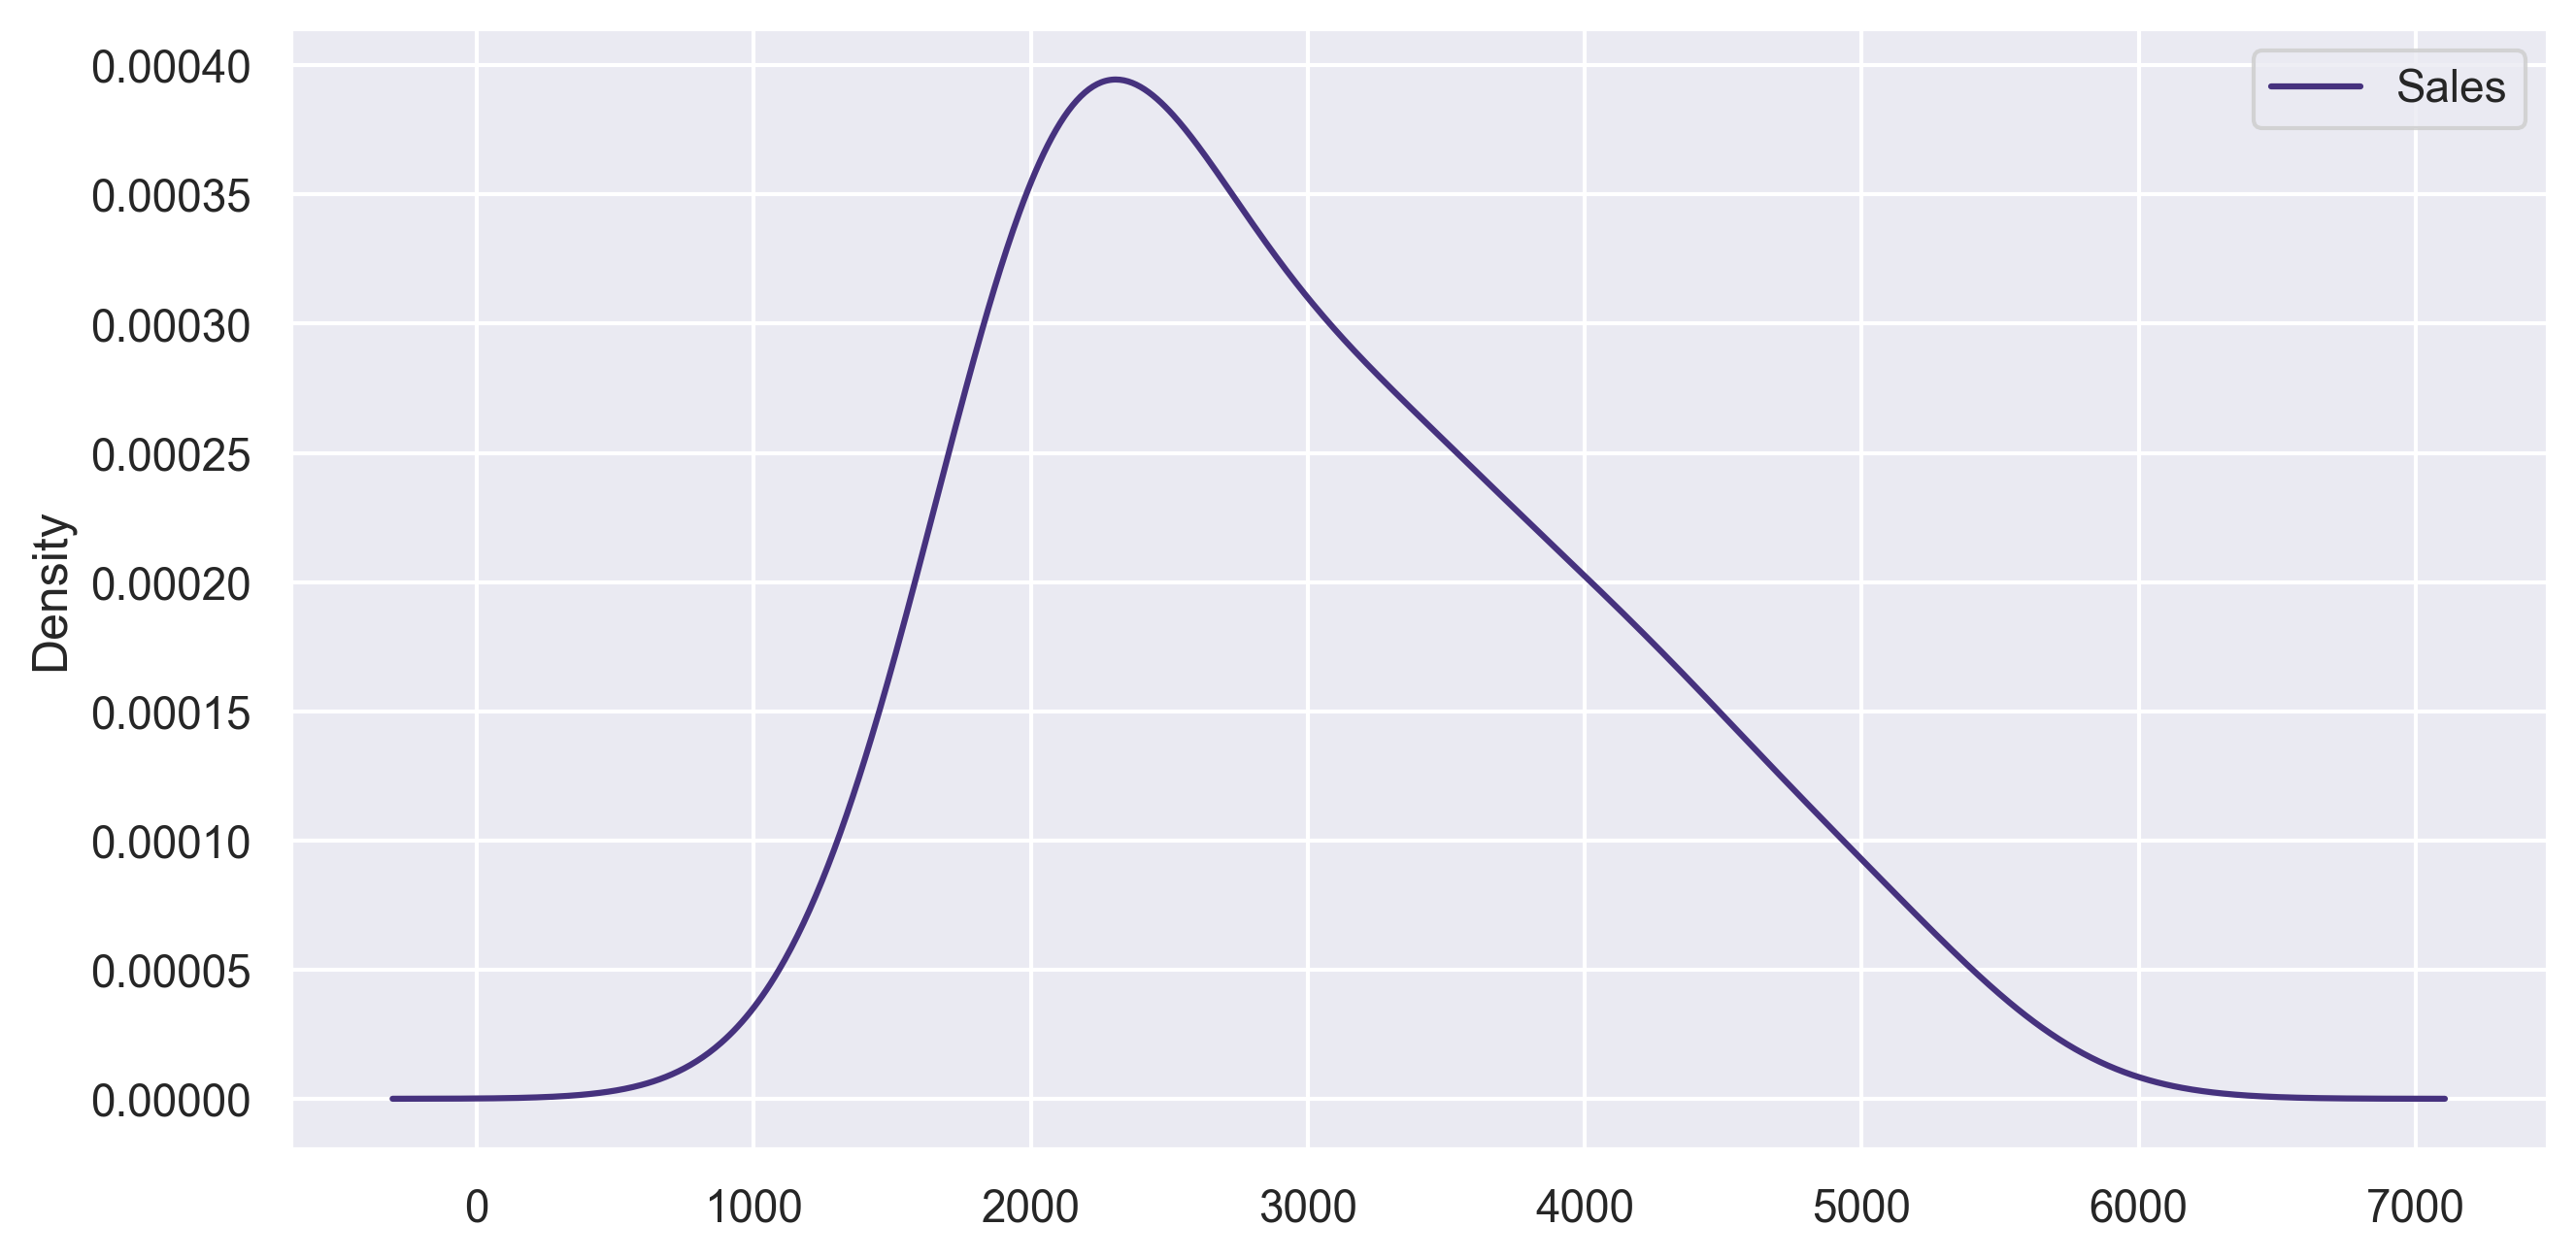

In [6]:
series.plot(kind="kde")

<Axes: xlabel='Sales', ylabel='Density'>

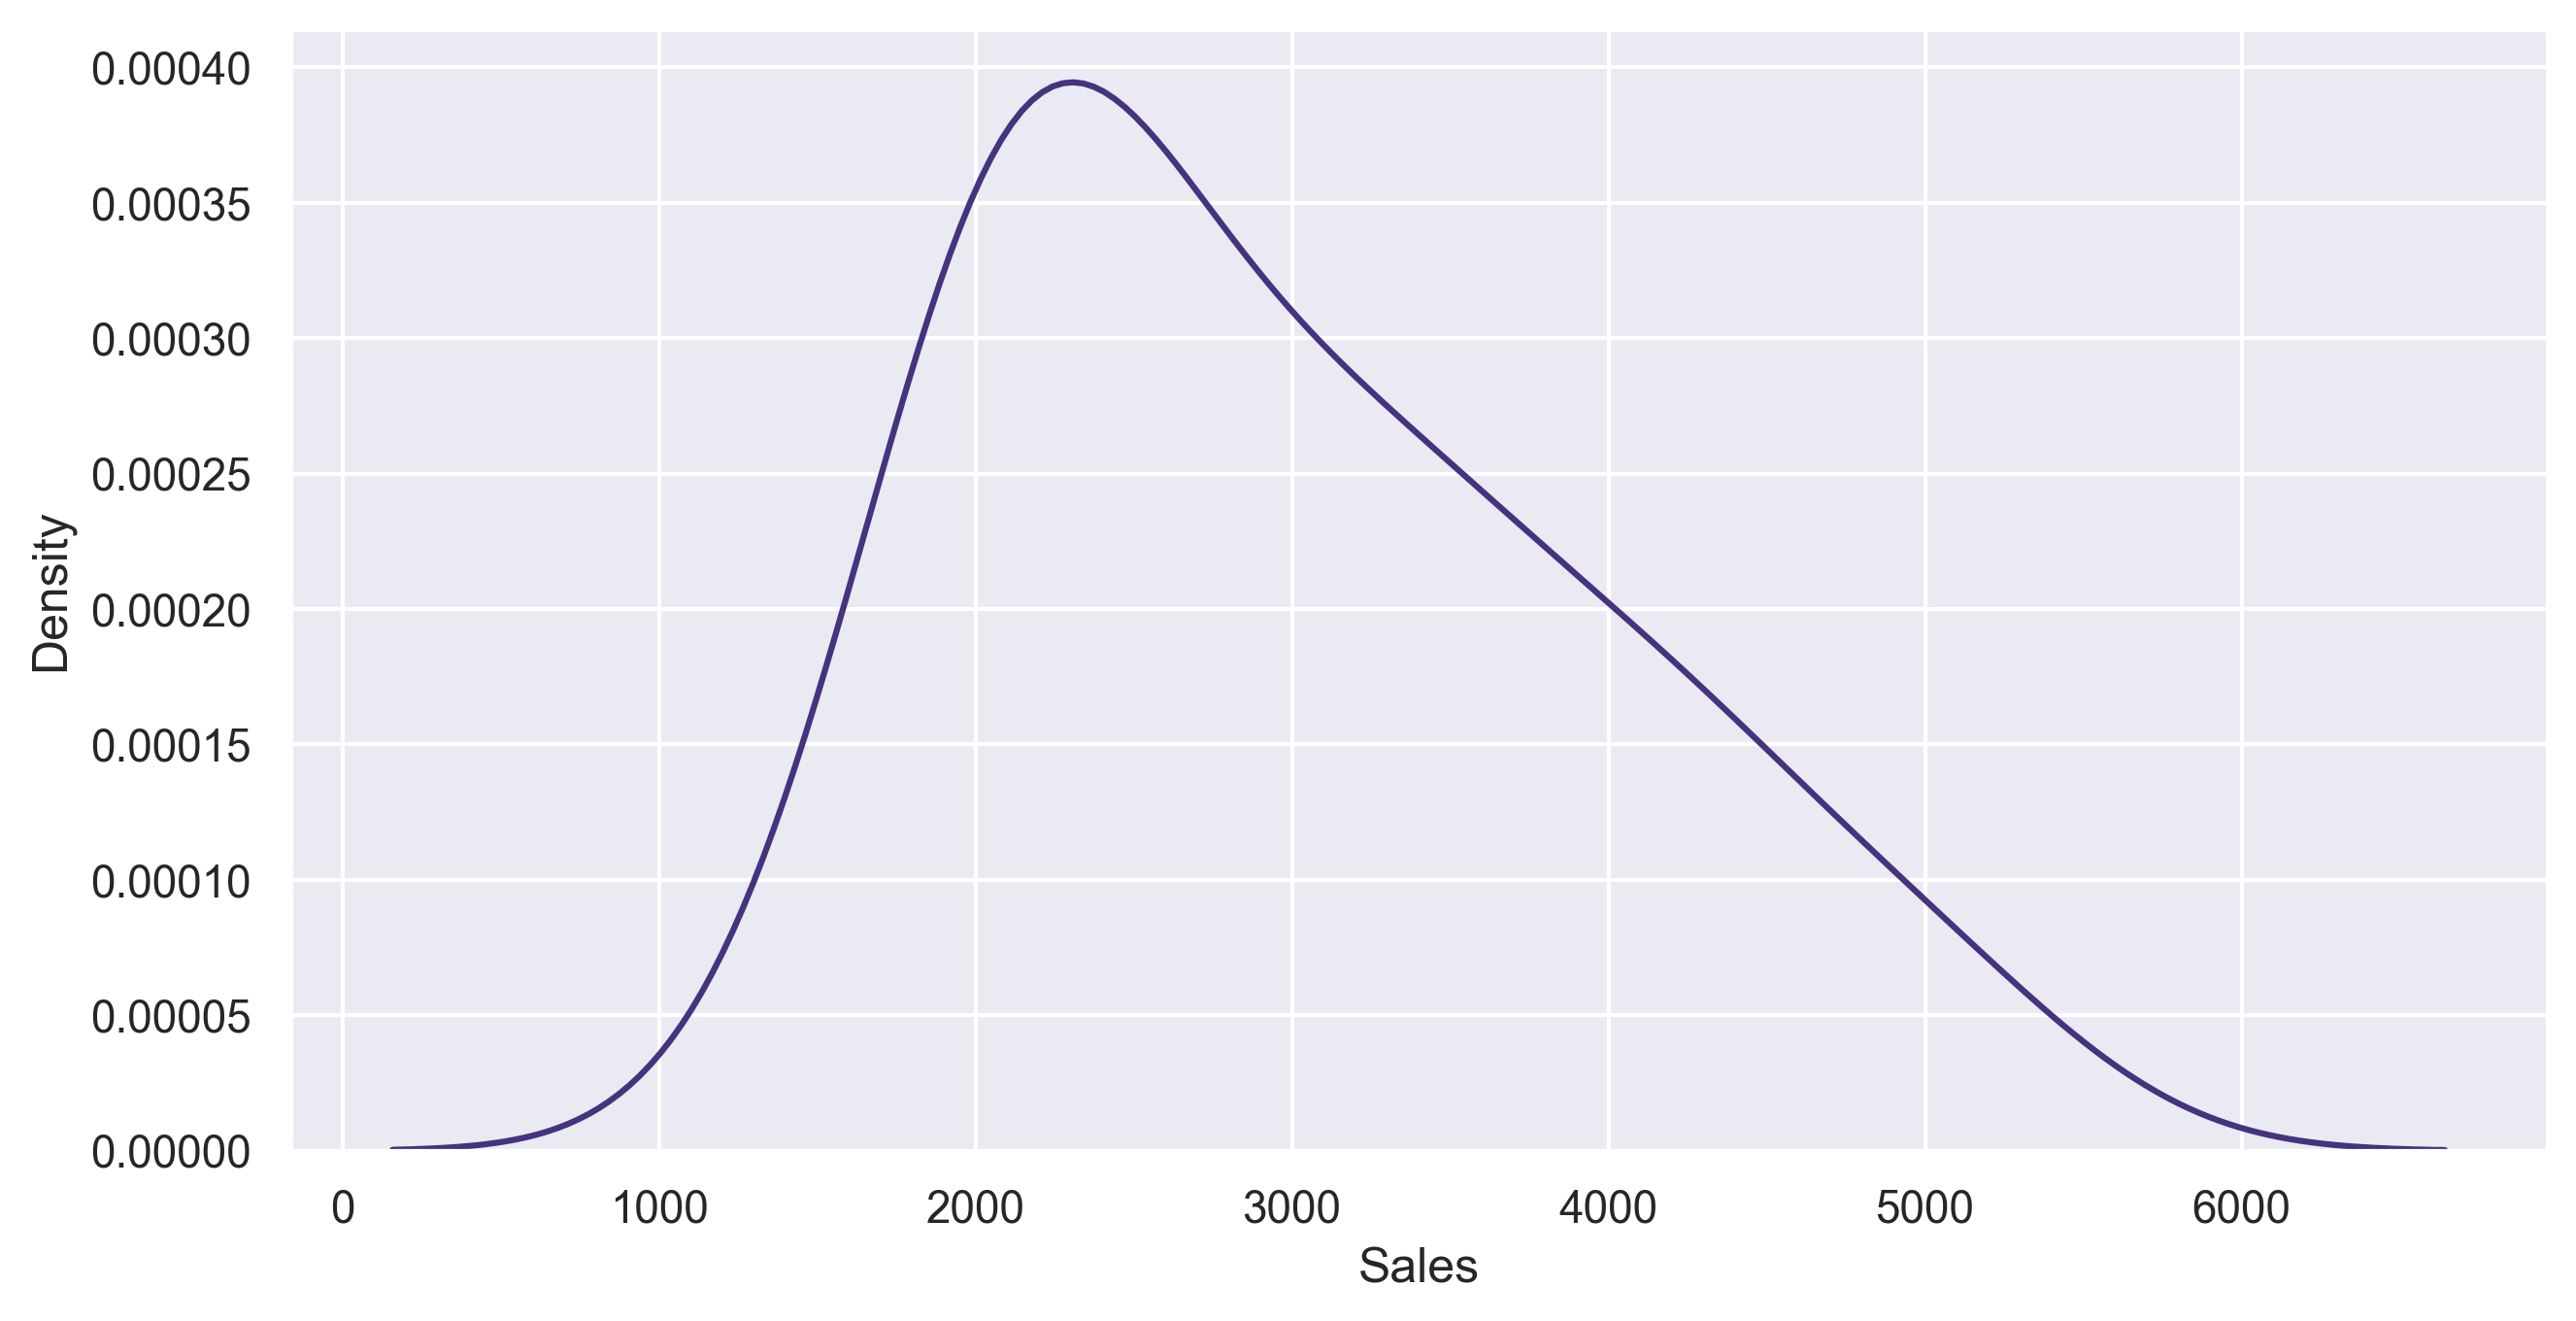

In [7]:
# Just checking if there is a diffenrence in the KDE plot when we use Pandas lib and Seaborn library
sns.kdeplot(series['Sales']) 

<Axes: >

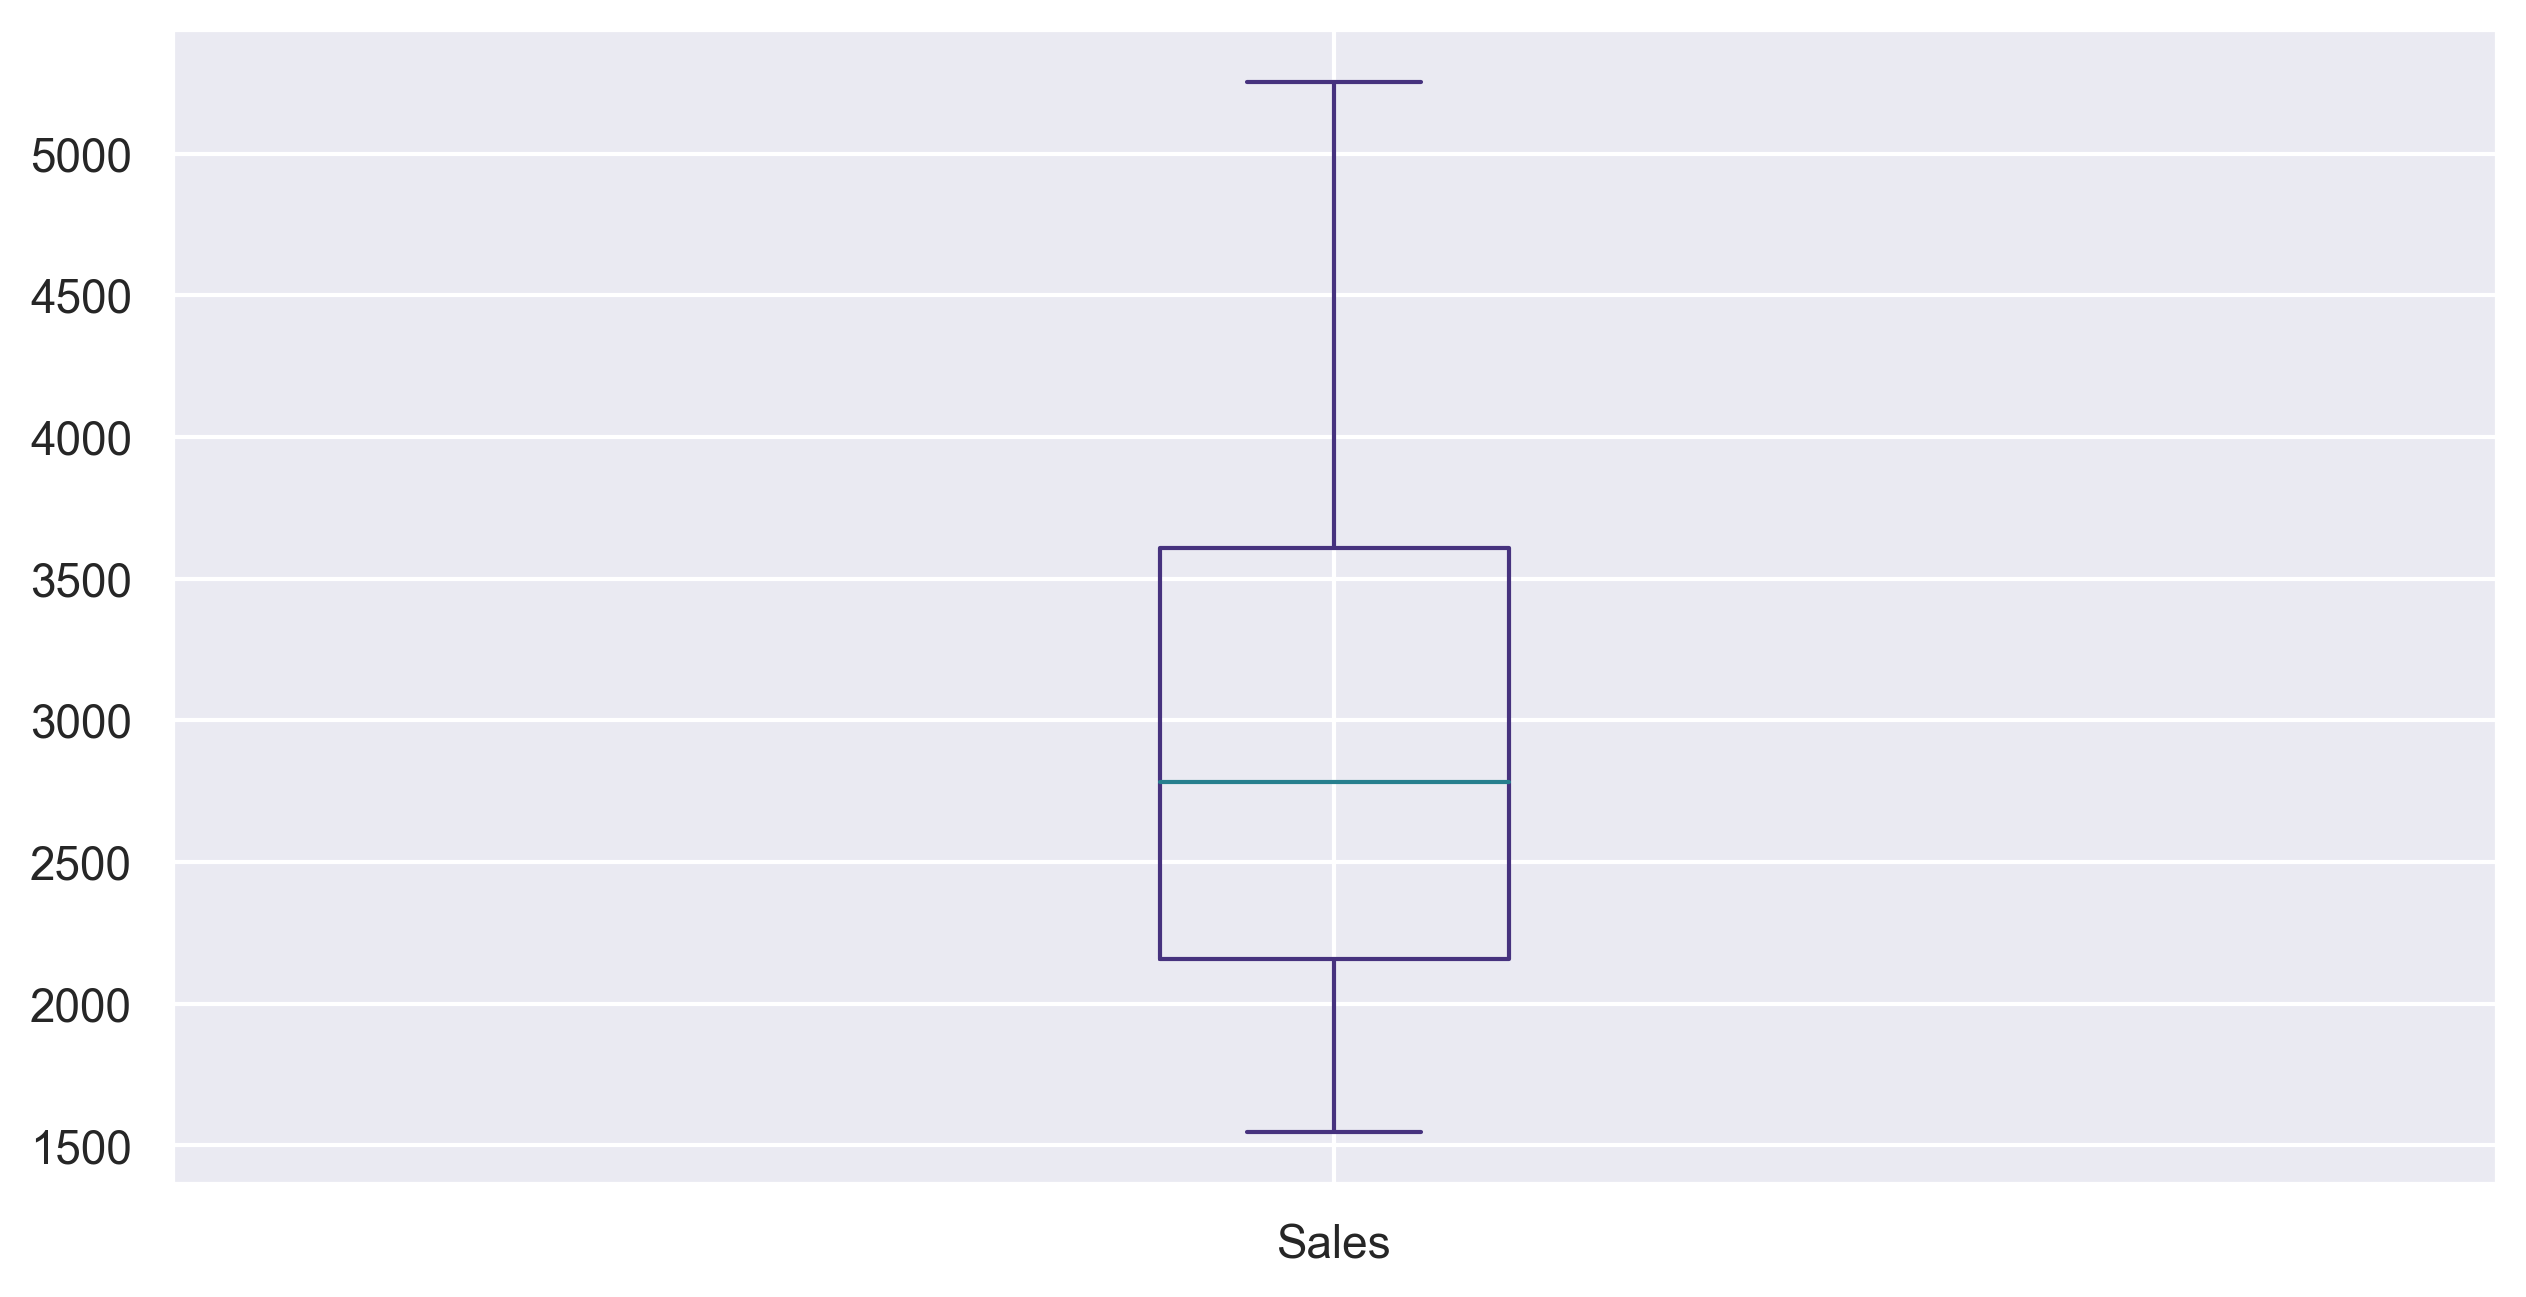

In [8]:
series.plot(kind="box")

As per the above visualualisation techniques we can consider the sales data follows a normal distribution.
It doesnot contain any outliers hence no treatment is needed.

Lag Plot

In [9]:
# Load the CocaCola prices dataset

# Prepare the dataset


series['Quarter'] = series['Quarter'].str.replace('Q1', '01-01')
series['Quarter'] = series['Quarter'].str.replace('Q2', '01-04')
series['Quarter'] = series['Quarter'].str.replace('Q3', '01-07')
series['Quarter'] = series['Quarter'].str.replace('Q4', '01-10')
series['Quarter'] = series['Quarter'].str.replace('_', '-')
series['Quarter'] = pd.to_datetime(series['Quarter'], format='%d-%m-%y')


series.set_index('Quarter', inplace=True)
series


,Sales
Quarter,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996
1987-04-01,2104.411995
1987-07-01,2014.362999
1987-10-01,1991.746998
1988-01-01,1869.049999


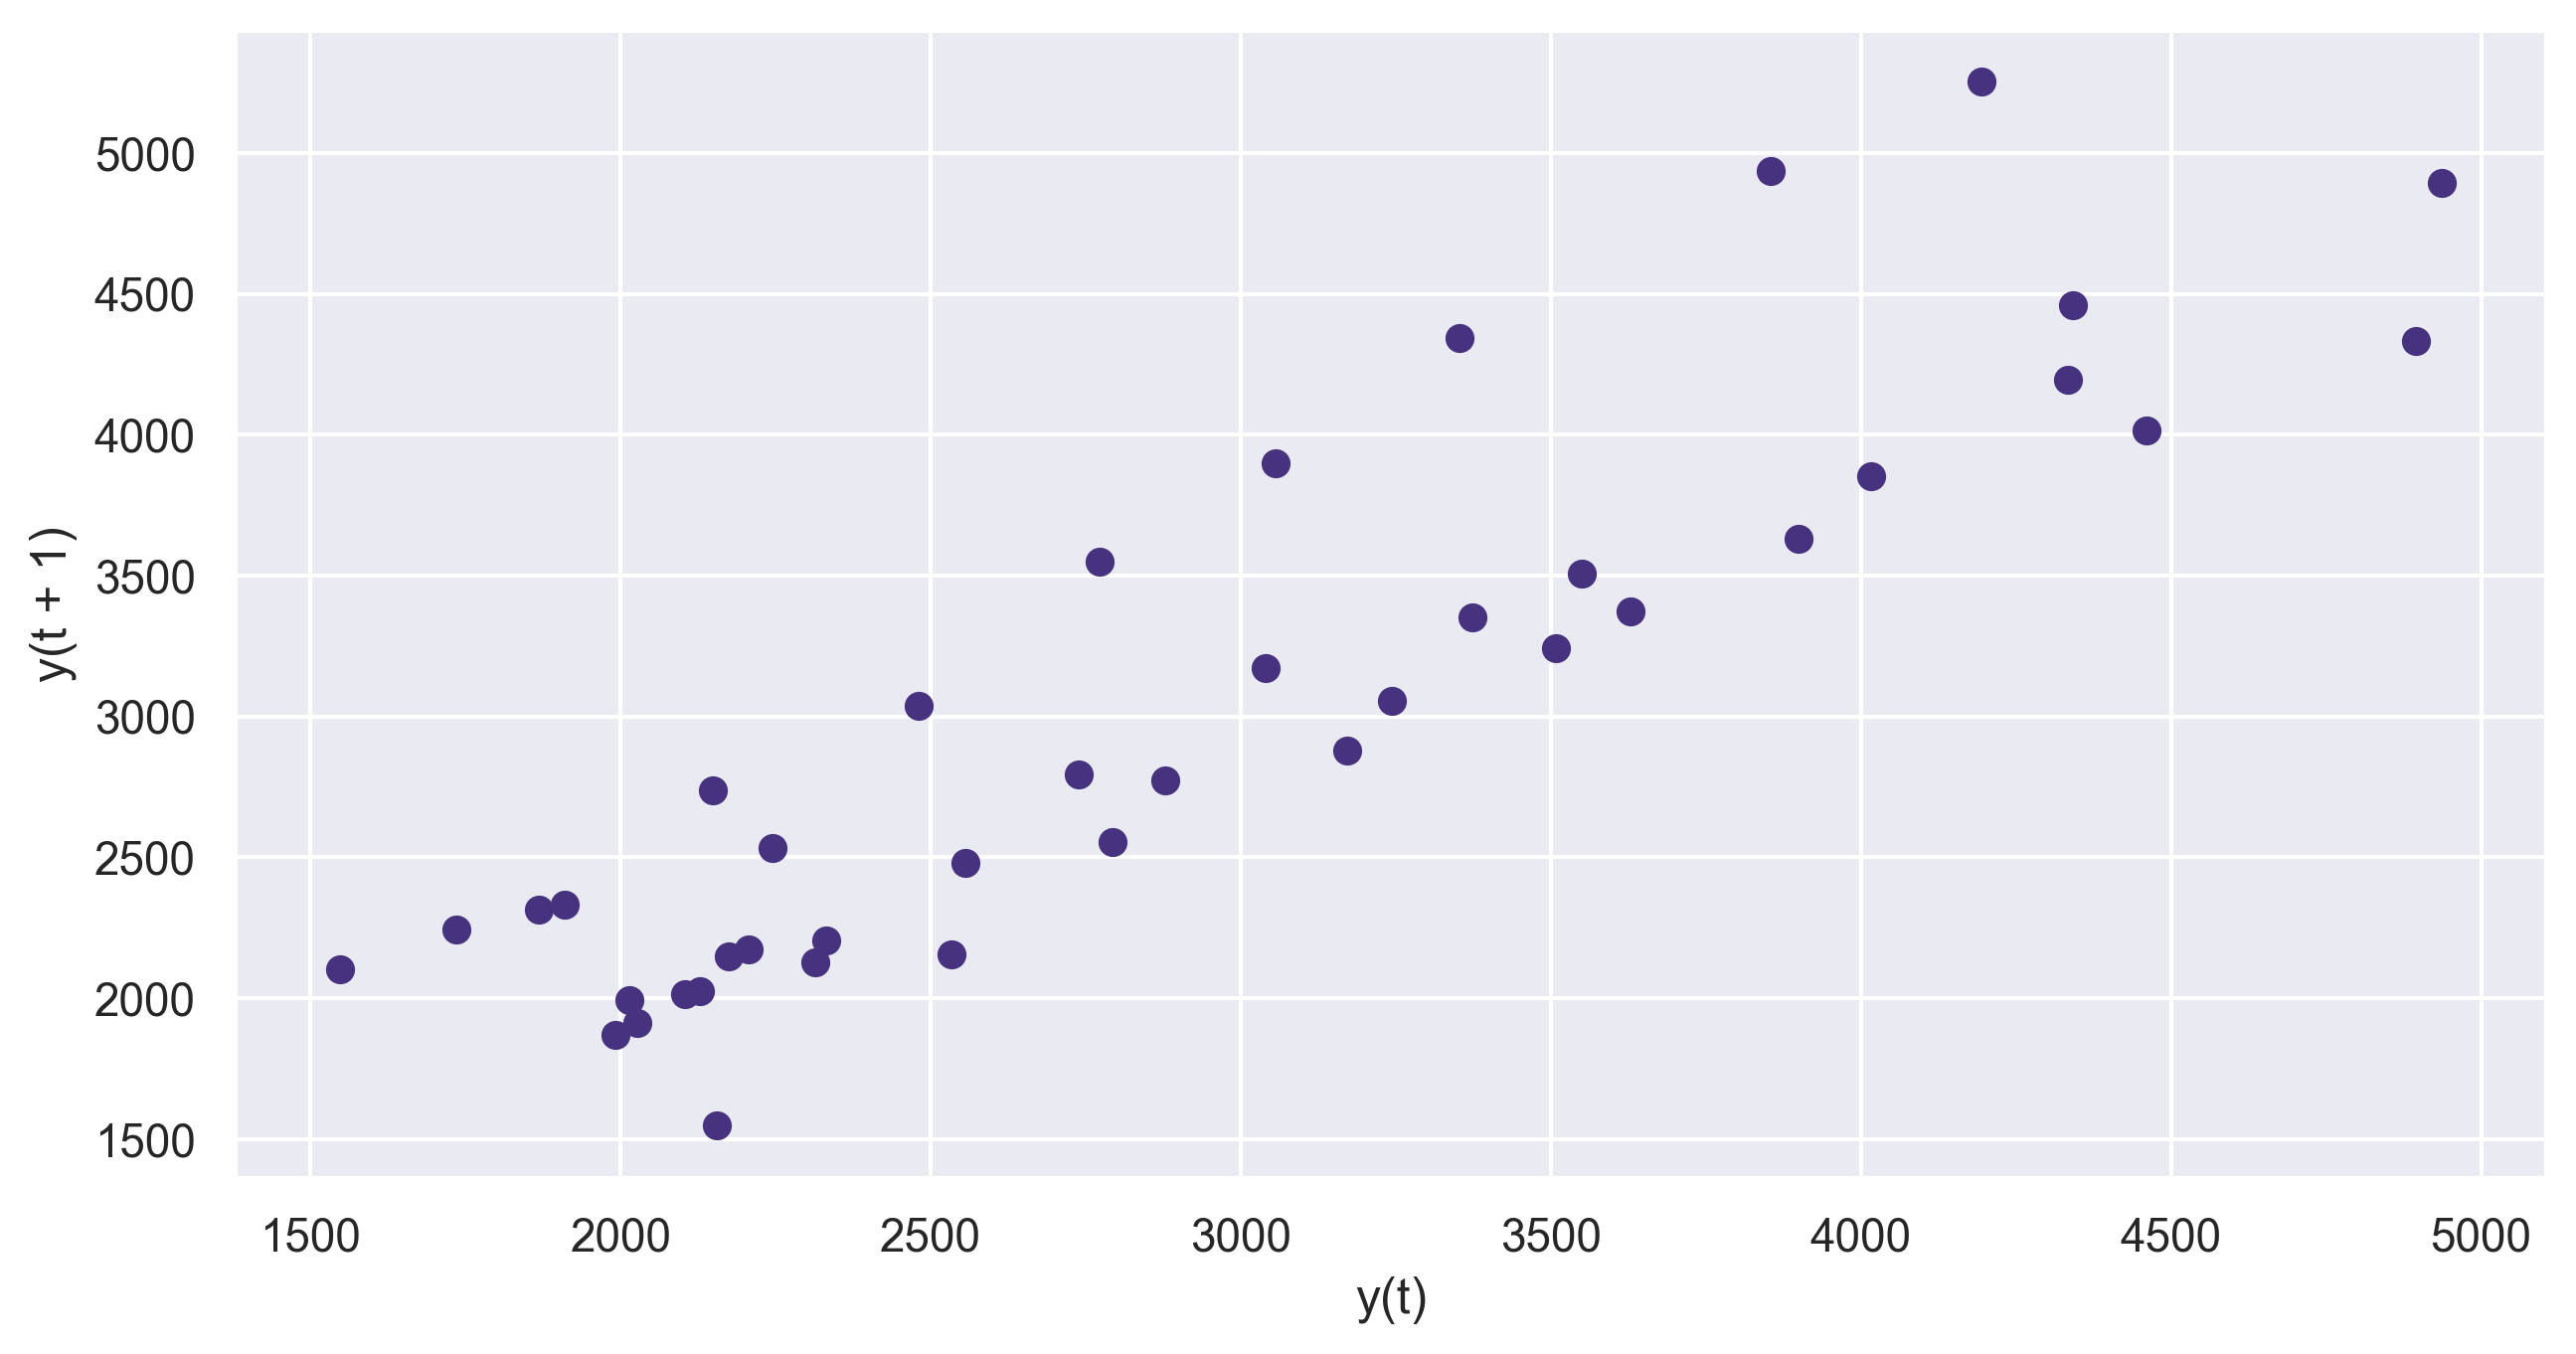

In [10]:
# create a scatter plot
from pandas.plotting import lag_plot
lag_plot(series)
plt.show()

Here from the lag plot we can see that it is Linear relationship between the 2 lag variables y(t) and y(t-1)

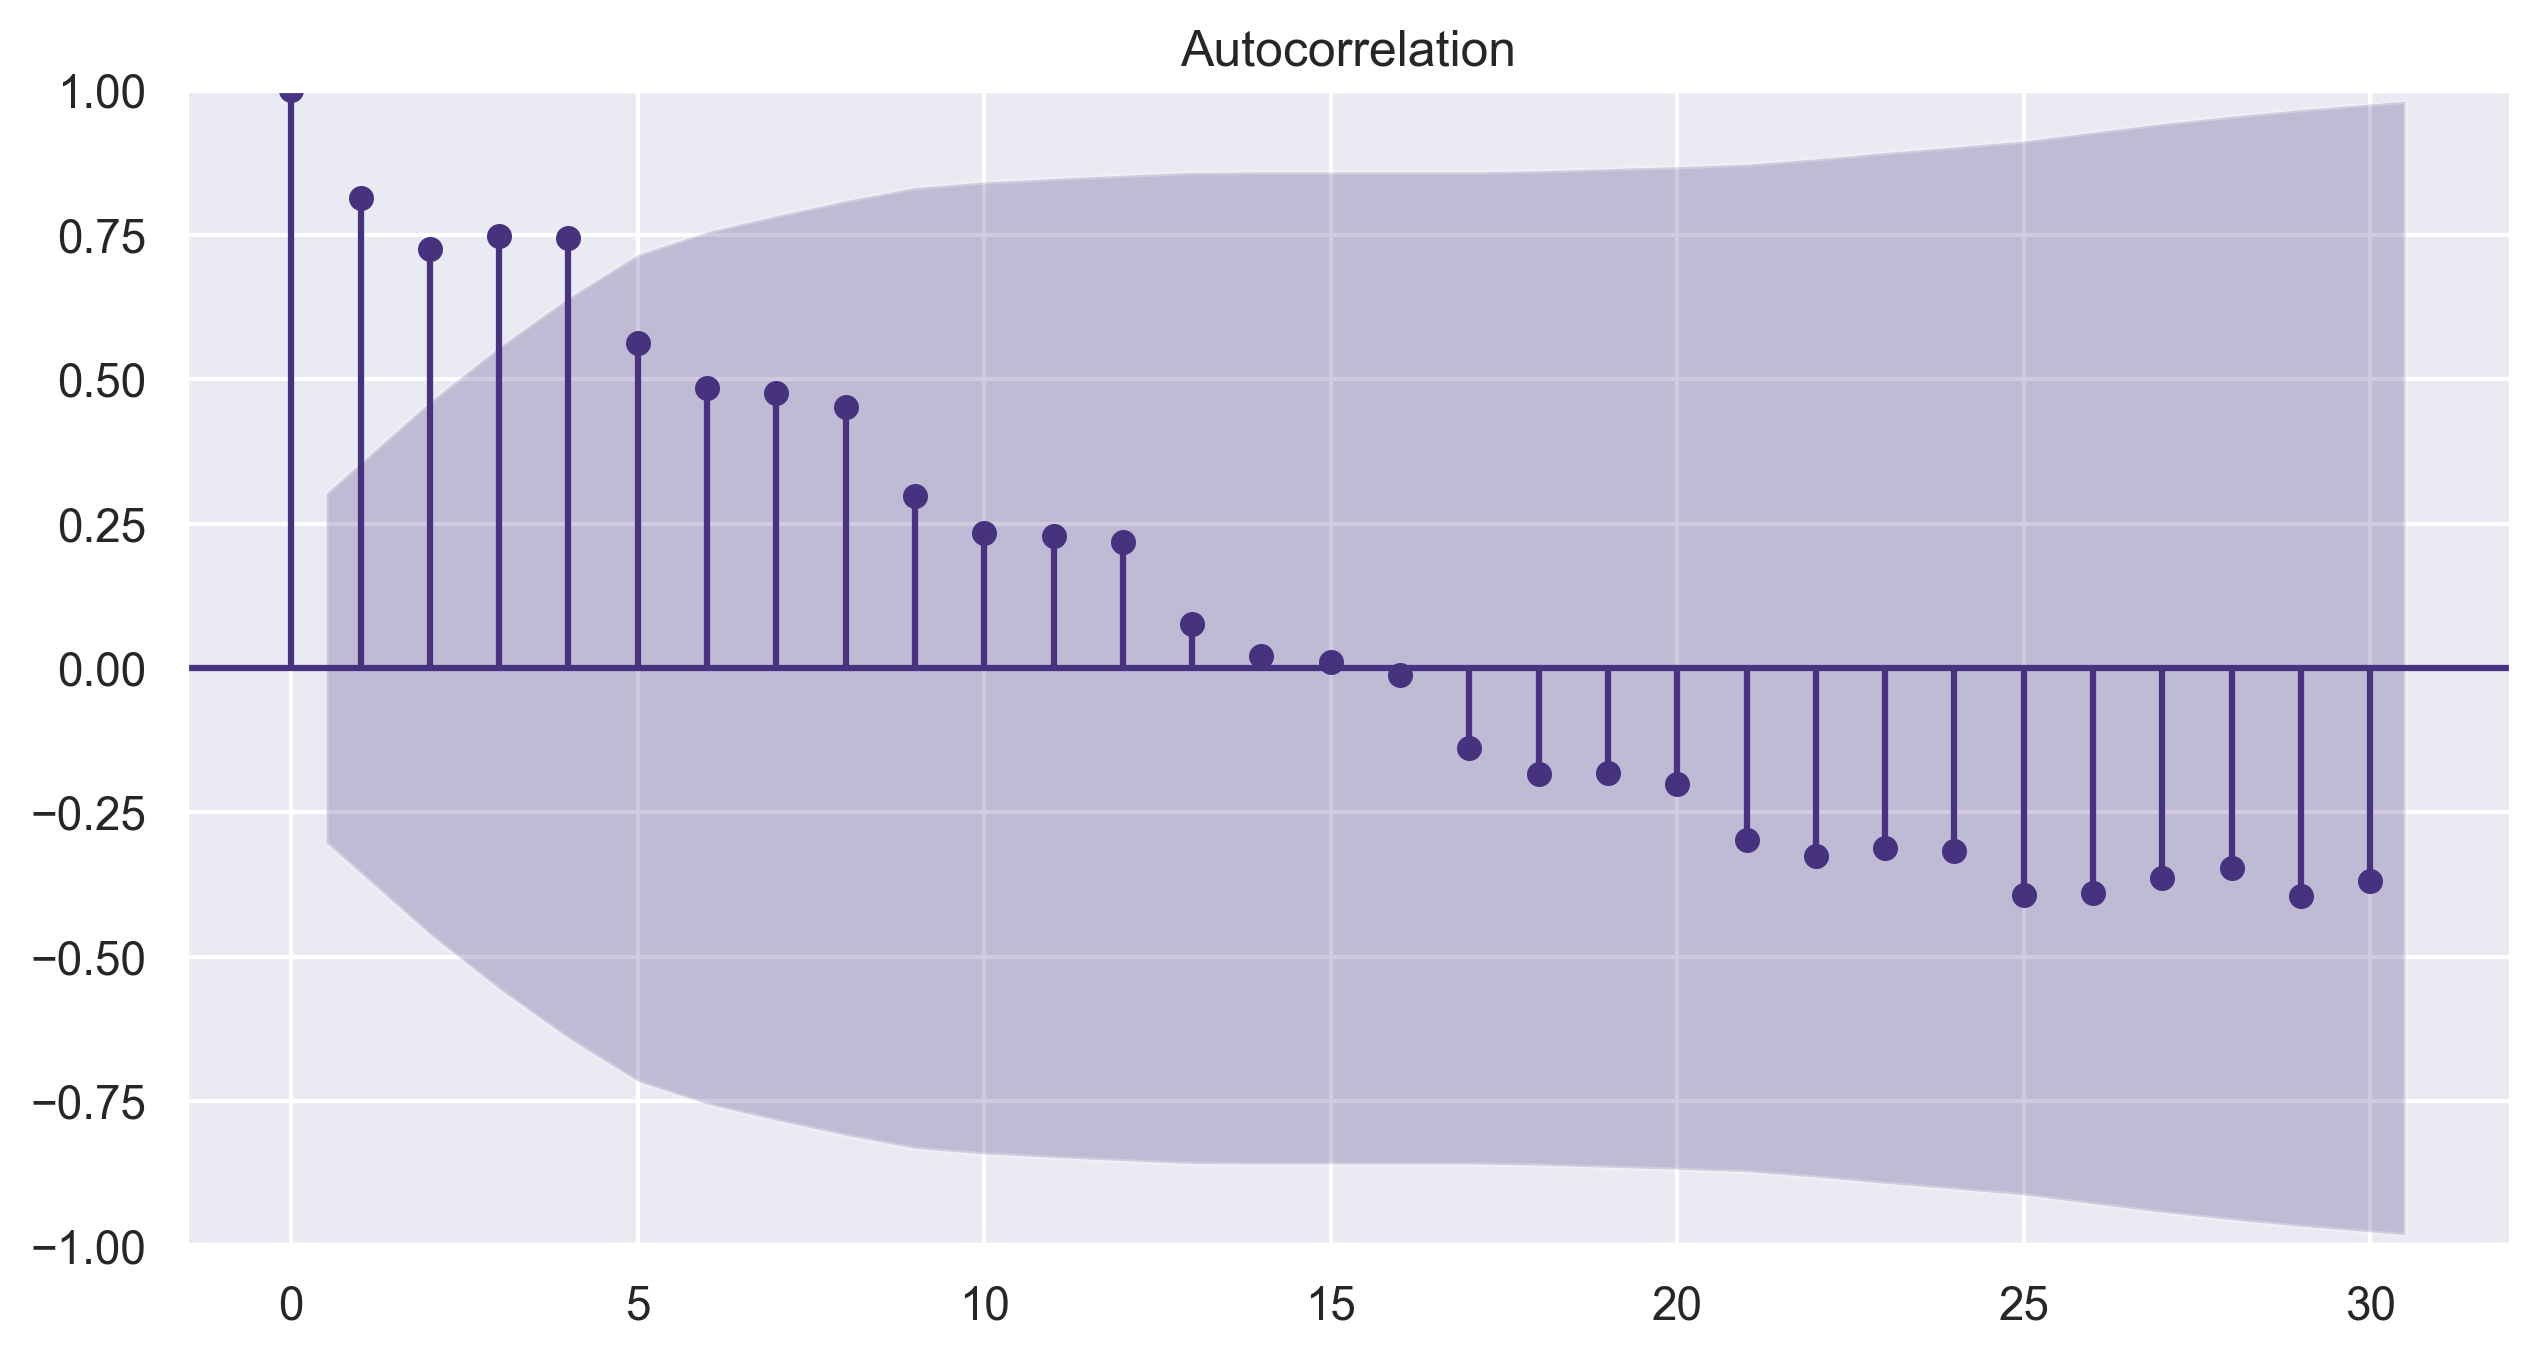

In [11]:
# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series,lags=30)
plt.show()

Here we have plotted the lags up to 30 against autocorrelation values there are both positive autocorrelations as well as negative correlations seens in the lag plotted. We will leave the negative correlations and focus on the positive ones since they have an impact on the current data our 0 lag value is always 1 since it is calculation the autocorrelation function woth otseld which will always be 1 .The next laga that we see that are afecting the most on the current data point is the y-1 lag.

(42, 1)

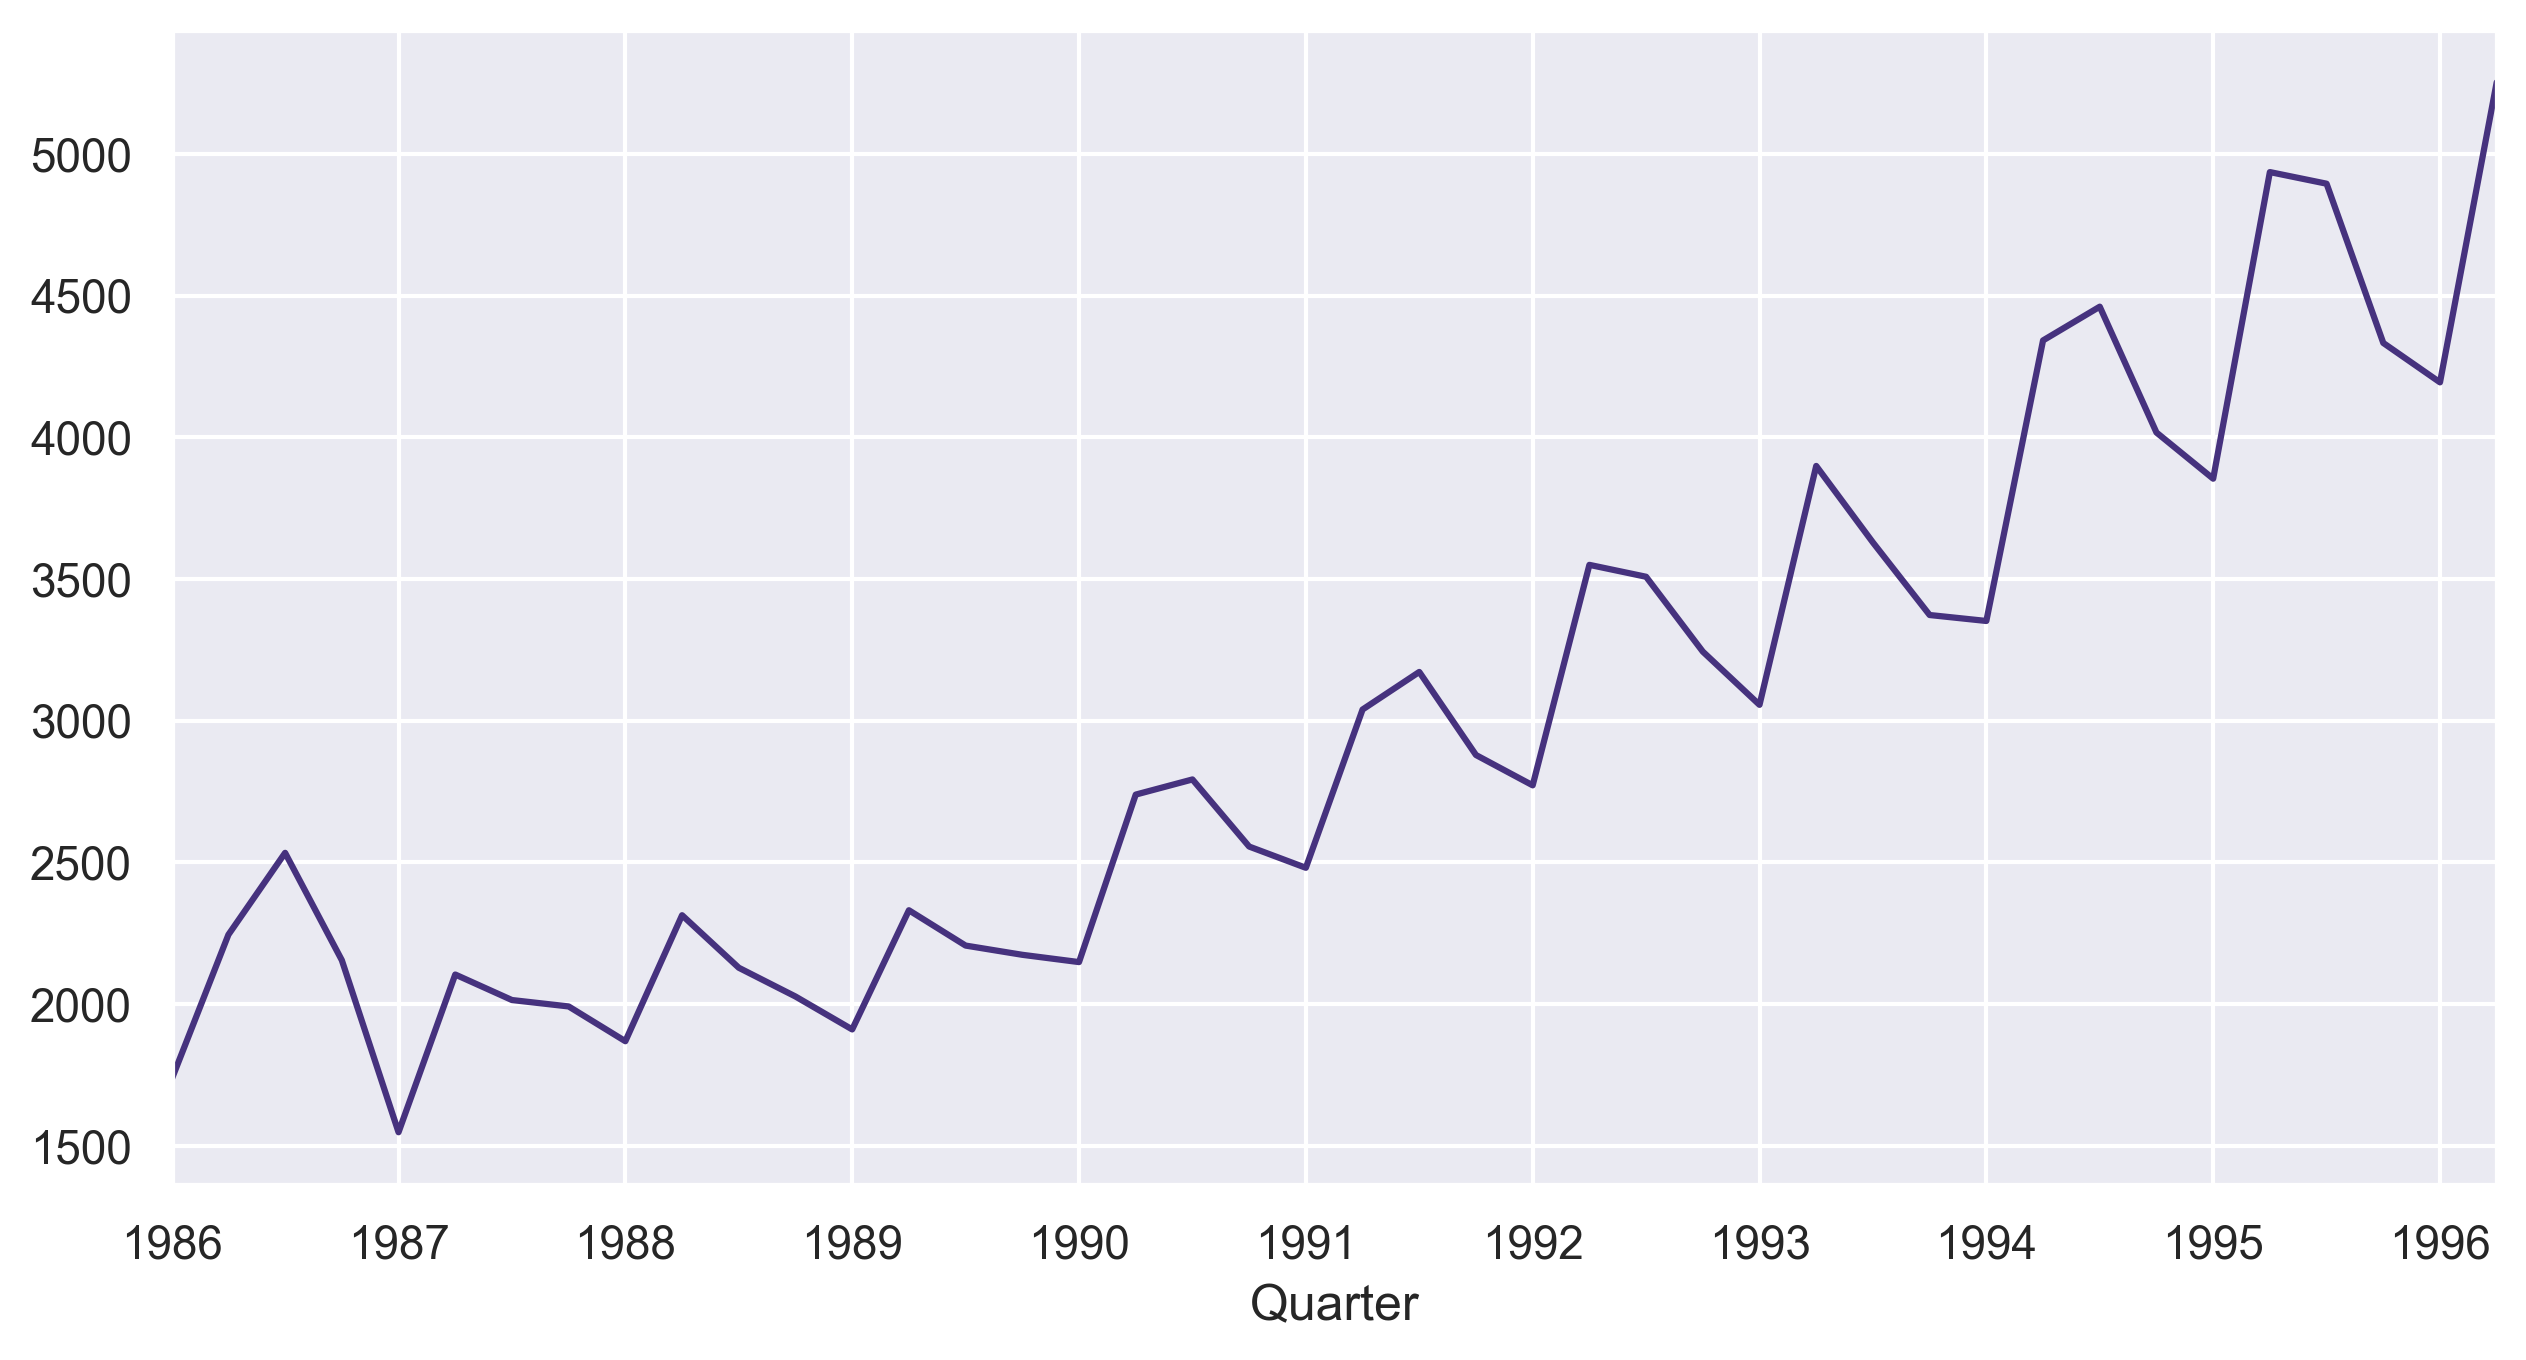

In [12]:
series.Sales.plot()
series.shape

Here from the Line plot that is plotted with year against the sales numbers we can see that there is a
Positive linear trend .
We may say a multiplicative seasonality component exists but after 1990 .

#Getting data ready wrt the equation variables.we would need t ,t2 ,logy,encoding for the quarters.
![Equations](forecasting.png)

In [14]:
import numpy as np
df =pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
# series = series.rename(columns={'Quarter': 'Datetime'})

# Calculate 't' and 't2' columns
df['t'] = np.arange(1, len(df) + 1)
df['t2'] = df['t'] ** 2

# Calculate 'logy' column (natural logarithm of 'Sales')
df['logSales'] = np.log(df['Sales'])

# Perform one-hot encoding for the 'Quarter' column

# Split the quarter string to separate 'Q' and the quarter number
df['Quarter1'] = df['Quarter'].str.split('_', expand=True)[0]

# Perform one-hot encoding for the 'Quarter' column
quarter_dummies = pd.get_dummies(df['Quarter1'], prefix='Quarter')

# Convert 'True' and 'False' to 1 and 0
quarter_dummies = quarter_dummies.astype(int)
df=df.drop(columns="Quarter1",axis=1)
# Concatenate the dummy columns to the original DataFrame
df = pd.concat([df, quarter_dummies], axis=1)



# Print the updated DataFrame
df

Train = df.head(30)
Test = df.tail(12)
Train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Quarter     30 non-null     object 
 1   Sales       30 non-null     float64
 2   t           30 non-null     int32  
 3   t2          30 non-null     int32  
 4   logSales    30 non-null     float64
 5   Quarter_Q1  30 non-null     int32  
 6   Quarter_Q2  30 non-null     int32  
 7   Quarter_Q3  30 non-null     int32  
 8   Quarter_Q4  30 non-null     int32  
dtypes: float64(2), int32(6), object(1)
memory usage: 1.5+ KB


In [15]:
from sklearn.metrics import mean_squared_error

# Model Building 

In [16]:
# # Convert 'Quarter' column to datetime type
# Train['Quarter'] = pd.to_datetime(Train['Quarter'])
# Test['Quarter'] = pd.to_datetime(Test['Quarter'])
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Quarter     30 non-null     object 
 1   Sales       30 non-null     float64
 2   t           30 non-null     int32  
 3   t2          30 non-null     int32  
 4   logSales    30 non-null     float64
 5   Quarter_Q1  30 non-null     int32  
 6   Quarter_Q2  30 non-null     int32  
 7   Quarter_Q3  30 non-null     int32  
 8   Quarter_Q4  30 non-null     int32  
dtypes: float64(2), int32(6), object(1)
memory usage: 1.5+ KB


In [17]:


#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test["t"])))
rmse_linear = np.sqrt(mean_squared_error(Test['Sales'], pred_linear))
rmse_linear

714.0144483281299

In [18]:
#Exponential

Exp = smf.ols('logSales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(mean_squared_error(Test['Sales'], pred_Exp))
rmse_Exp

4252.188990972336

In [19]:
#Quadratic 

Quad = smf.ols('Sales~t+t2',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t2"]]))
rmse_Quad = np.sqrt(mean_squared_error(Test['Sales'],pred_Quad))
rmse_Quad

646.2715428311304

In [20]:
#Additive seasonality 

add_sea = smf.ols('Sales~Quarter_Q1+Quarter_Q2+Quarter_Q3',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Quarter_Q1','Quarter_Q2','Quarter_Q3']]))
rmse_add_sea = np.sqrt(mean_squared_error(Test['Sales'], pred_add_sea))
rmse_add_sea

1778.006546794136

In [21]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t2+Quarter_Q1+Quarter_Q2+Quarter_Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Quarter_Q1','Quarter_Q2','Quarter_Q3','t','t2']]))
rmse_add_sea_quad = np.sqrt(mean_squared_error(Test['Sales'], pred_add_sea_quad))
rmse_add_sea_quad

586.053306787034

In [22]:
#Multiplicative Seasonality 

Mul_Add_sea = smf.ols('logSales~t+Quarter_Q1+Quarter_Q2+Quarter_Q3',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(mean_squared_error(Test['Sales'], pred_Mult_add_sea))
rmse_Mult_add_sea 

4252.1856557932215

In [23]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,586.053307
2,rmse_Quad,646.271543
0,rmse_linear,714.014448
3,rmse_add_sea,1778.006547
5,rmse_Mult_sea,4252.185656
1,rmse_Exp,4252.188991


# As per the above analysis we can conclude that the best model is Additive Seasonality Quadratic model since it is showing the lowest RMSE value.

# Moving Average 

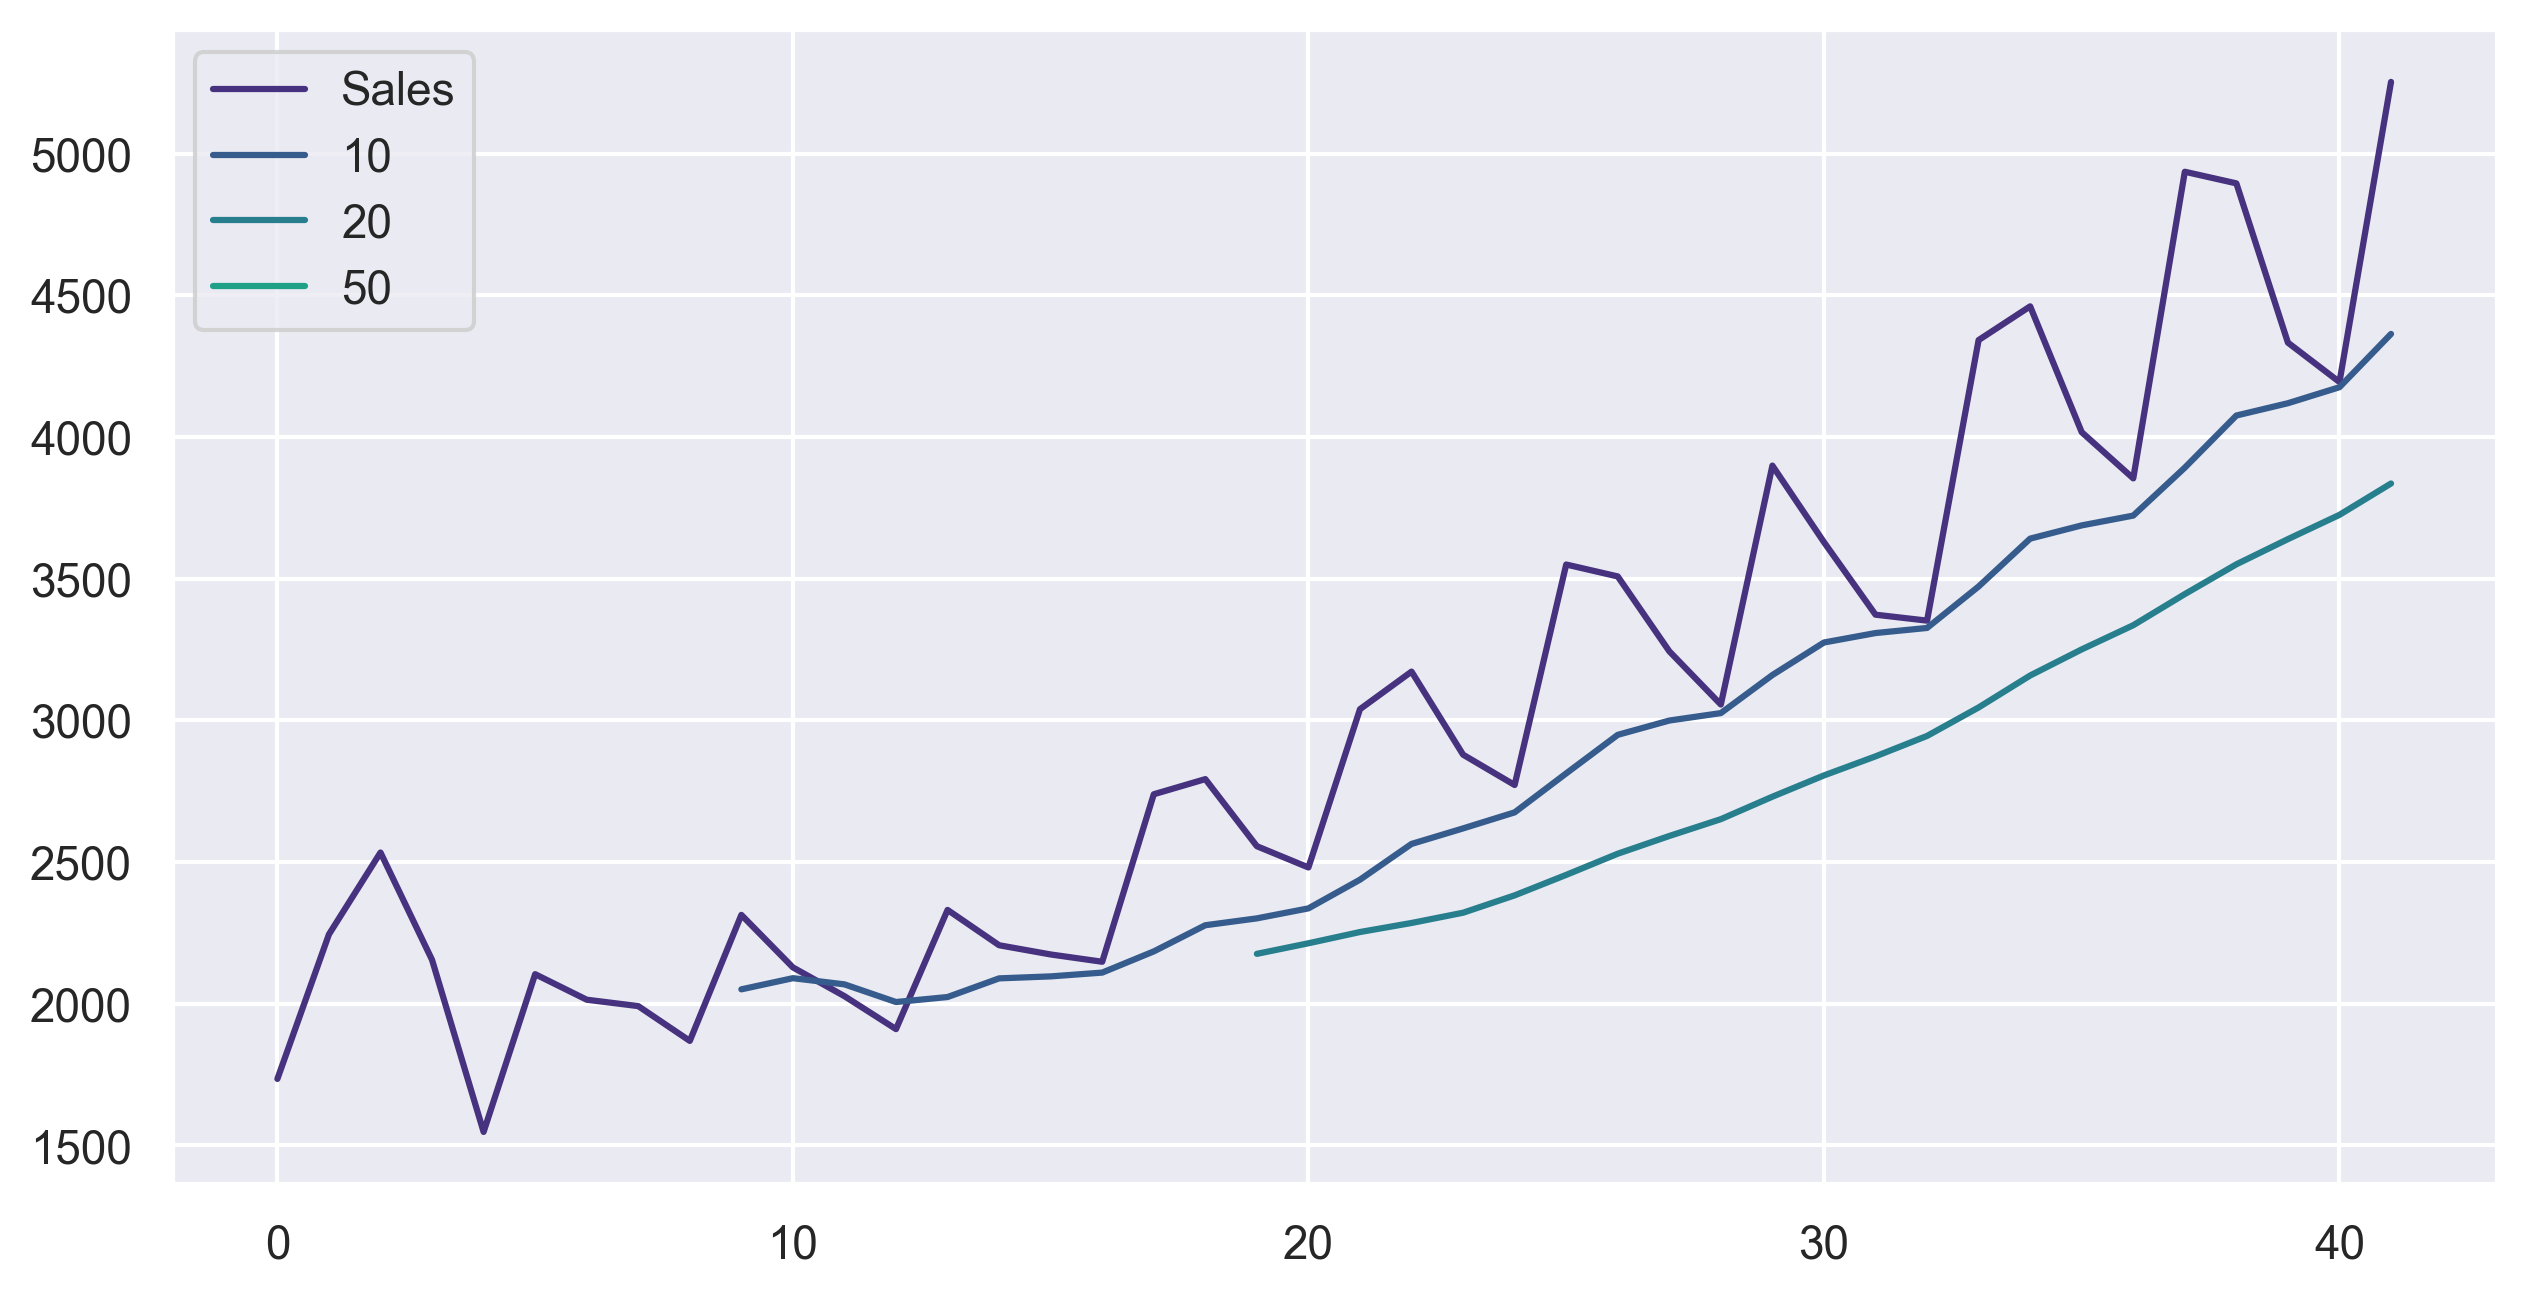

In [24]:
df['Sales'].plot()
df['Sales'].rolling(10).mean().plot(label = '10')
df['Sales'].rolling(20).mean().plot(label = '20')
df['Sales'].rolling(50).mean().plot(label = 50)
plt.legend()

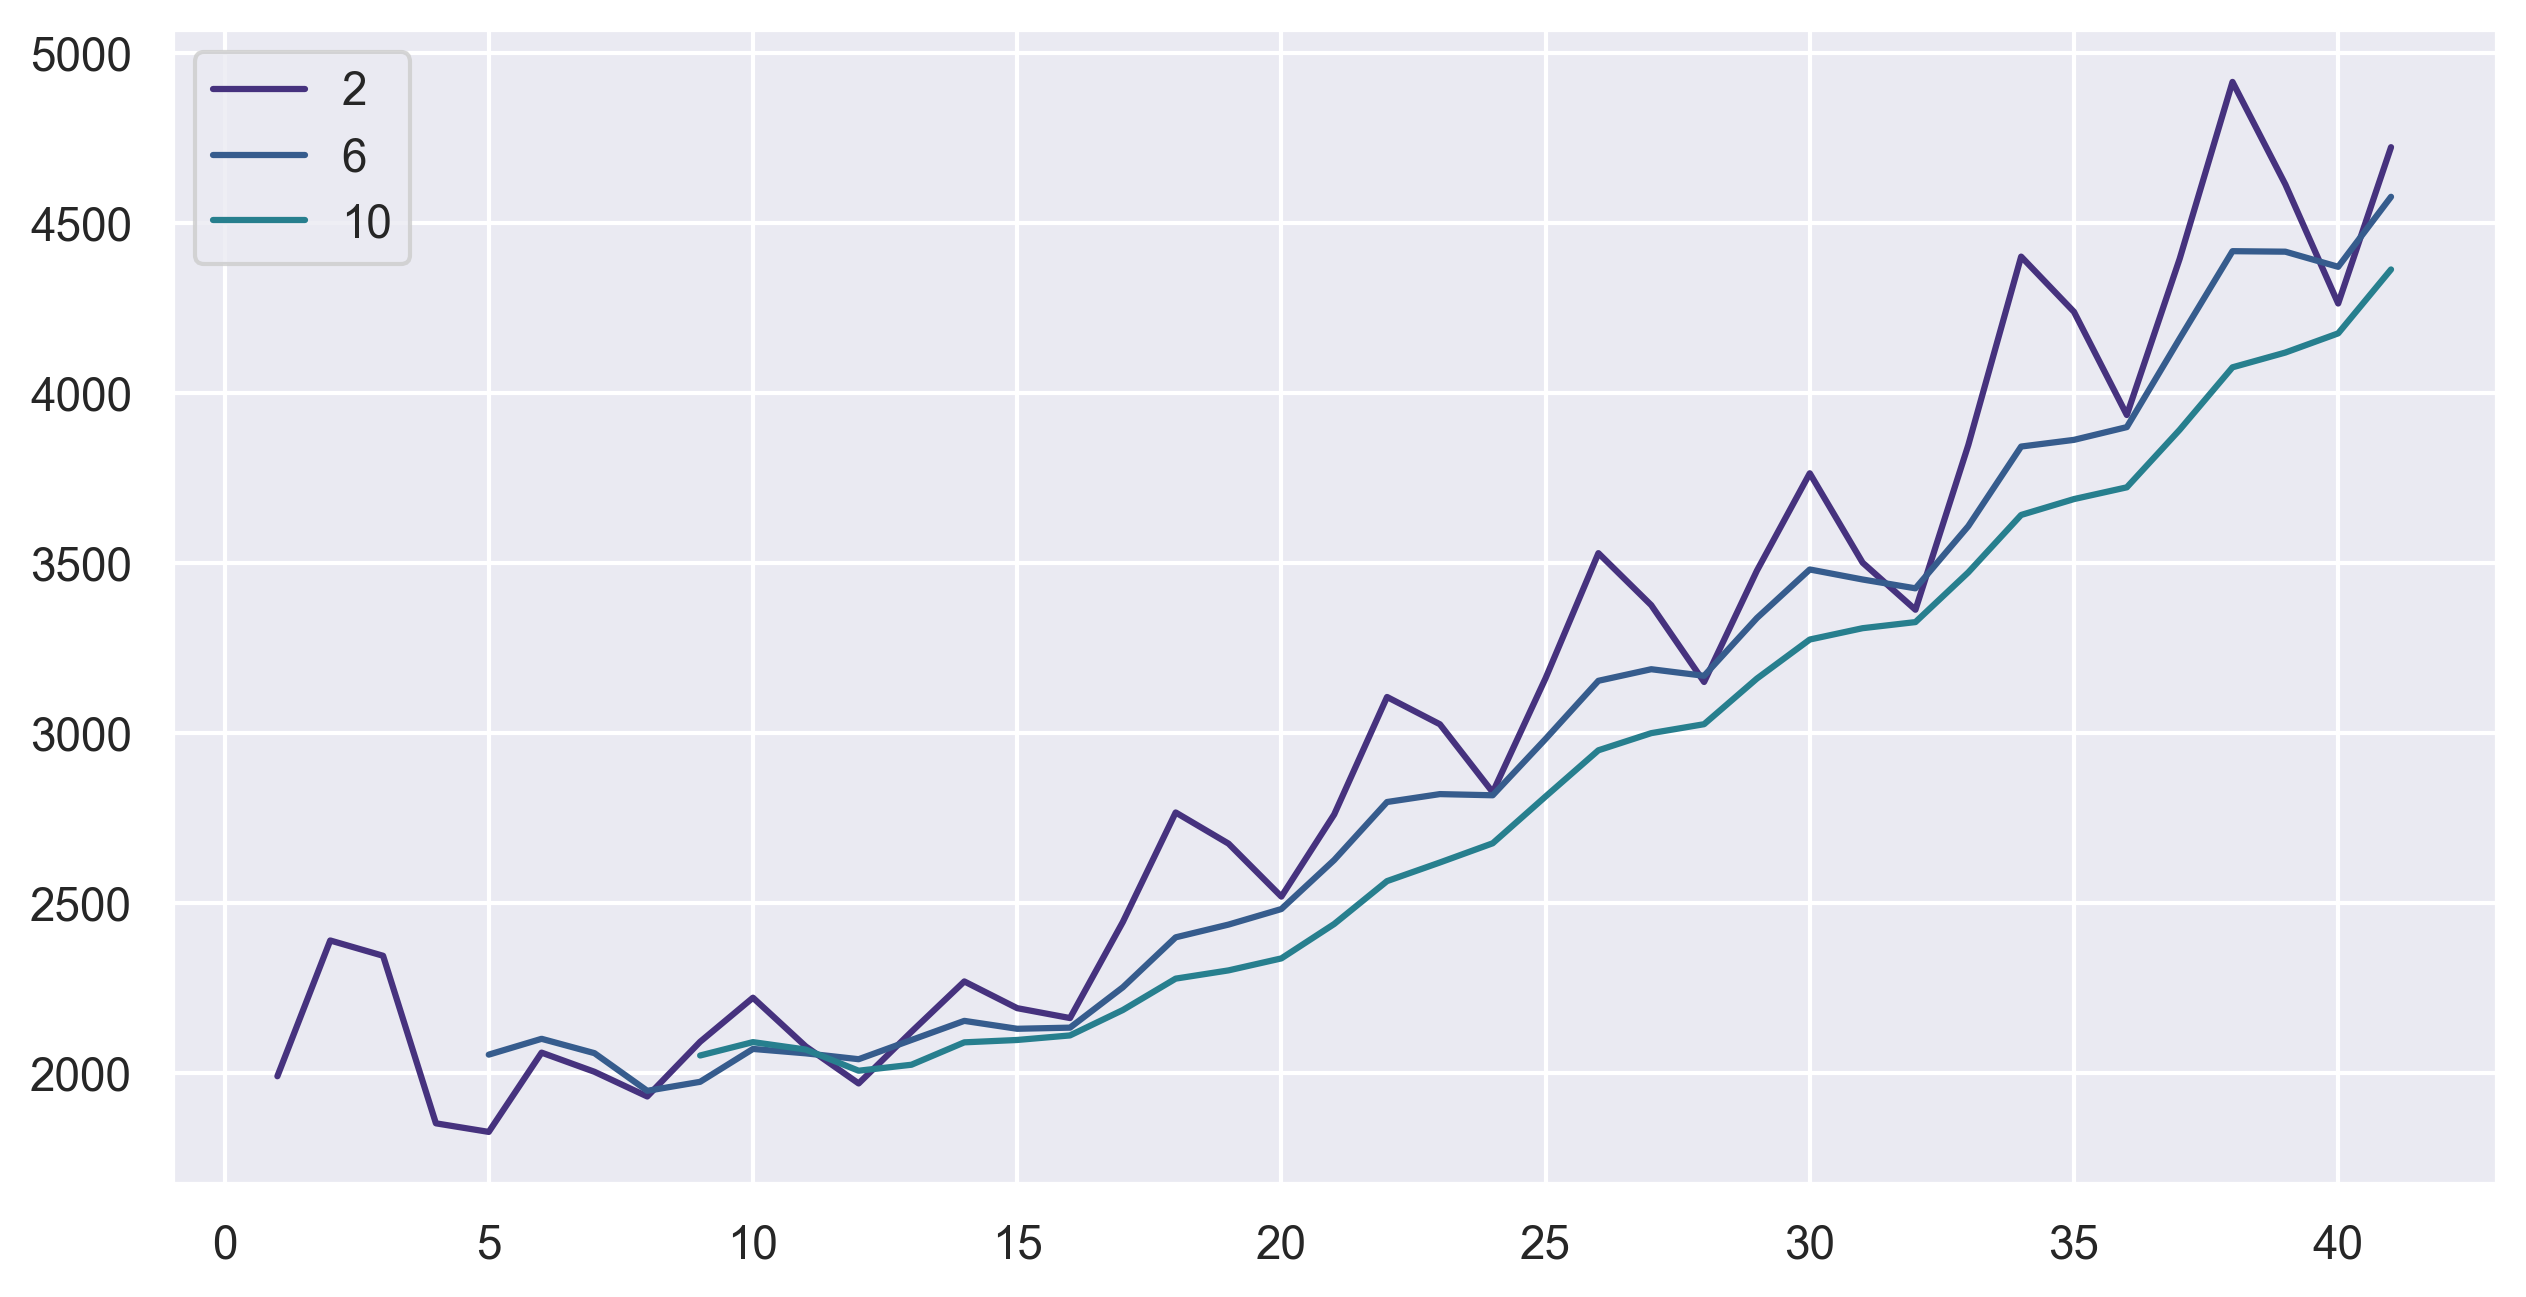

In [25]:
for i in range(2,12,4):
    df['Sales'].rolling(i).mean().plot(label = str(i))
    plt.legend()